In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#000000']
linestyles = [':', '-.', '--', (0, (3, 1, 1, 1)), '-', (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1))]
alg_names = {0:'Hallway Patrol', 1: "Belief Gobbler", 3:'D-MPDM', 7:'D-MPDM-right_hand', 8:'D-MPDM-both-hands', 11:'D-MPDM-gather'}
graph_names = ['Mean Steps Until Coverage on Beyster Floor 3', 'Mean Steps Until Coverage on Square', 'Mean Steps Until Coverage on Office', 'Mean Steps Until Coverage on Museum']

In [4]:
def read_data(filenames):
    final_data = []
    for file_idx, filename in enumerate(filenames):
        
        with open(filename) as data_file:
            for l in data_file.readlines():
                vals = l.strip().split()
                if (vals[0] == 'Simulations'):
                    continue
                simulations = vals[0]
                runs = vals[1]
                undiscounted_reutrn = vals[2]
                undiscounted_error = vals[3]
                discounted_return = vals[4]
                discounted_error = vals[5]
                time = vals[6]

                final_data.append({
                    'file_idx' : file_idx,
                    'simulations': simulations, 
                    'runs': runs, 
                    'undiscounted_reutrn': undiscounted_reutrn, 
                    'discounted_return': discounted_return, 
                    'discounted_error': discounted_error, 
                    'time': time})
    final_data_df = pd.DataFrame(final_data).apply(pd.to_numeric)
    return final_data_df

In [5]:
def plot_final_data(data):

    pivoted_mean = pd.pivot_table(final_data_df, values='discounted_return', index=['simulations'], columns=['file_idx'])
    pivoted_var = pd.pivot_table(final_data_df, values='discounted_error', index=['simulations'], columns=['file_idx'])
    
    plt.figure(figsize=(8, 6), dpi=150)
    plt.title('Test')
    for file_idx, filename in enumerate(filenames):
        plt.errorbar(pivoted_mean.index, pivoted_mean[file_idx], pivoted_var[file_idx], label=filenames[file_idx], \
            color=colors[file_idx], linestyle=linestyles[file_idx], linewidth=2)
    plt.ylim(bottom=0)
    plt.xscale('log')
    plt.xlabel('Simulations')
    plt.ylabel('Average Discounted Return')
    plt.legend()


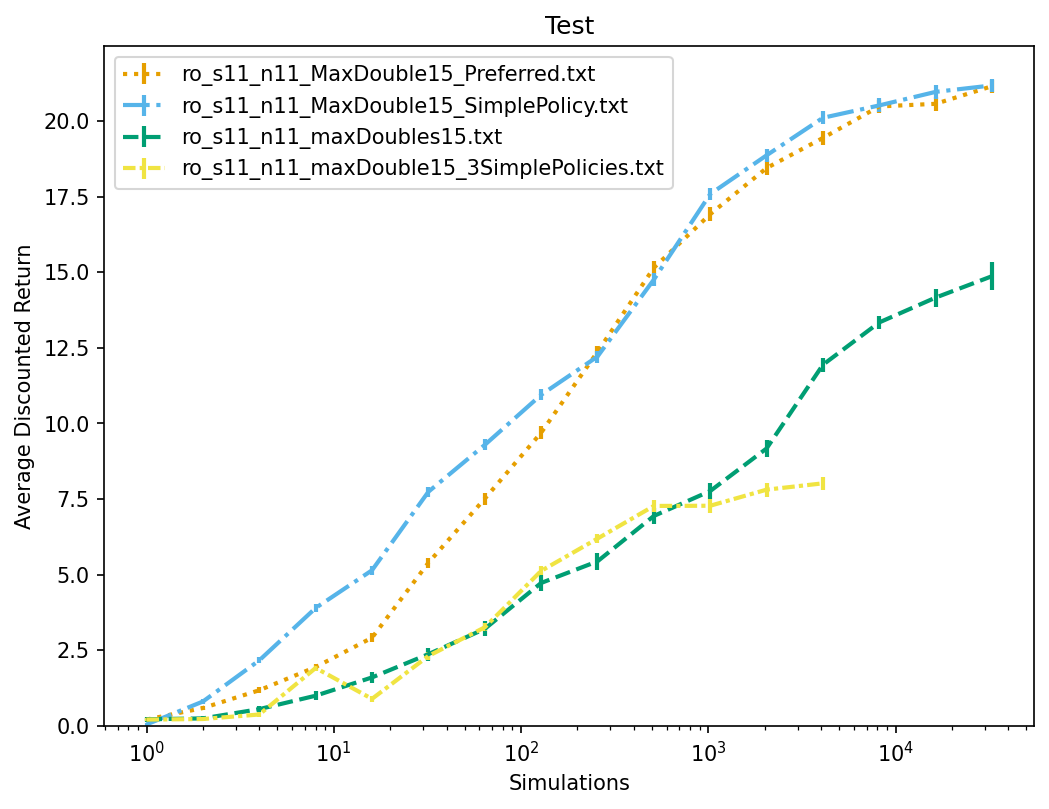

In [6]:
filenames = [
    'ro_s11_n11_MaxDouble15_Preferred.txt',
    'ro_s11_n11_MaxDouble15_SimplePolicy.txt',
    'ro_s11_n11_maxDoubles15.txt',
    'ro_s11_n11_maxDouble15_3SimplePolicies.txt']

final_data_df = read_data(filenames)
plot_final_data(final_data_df)

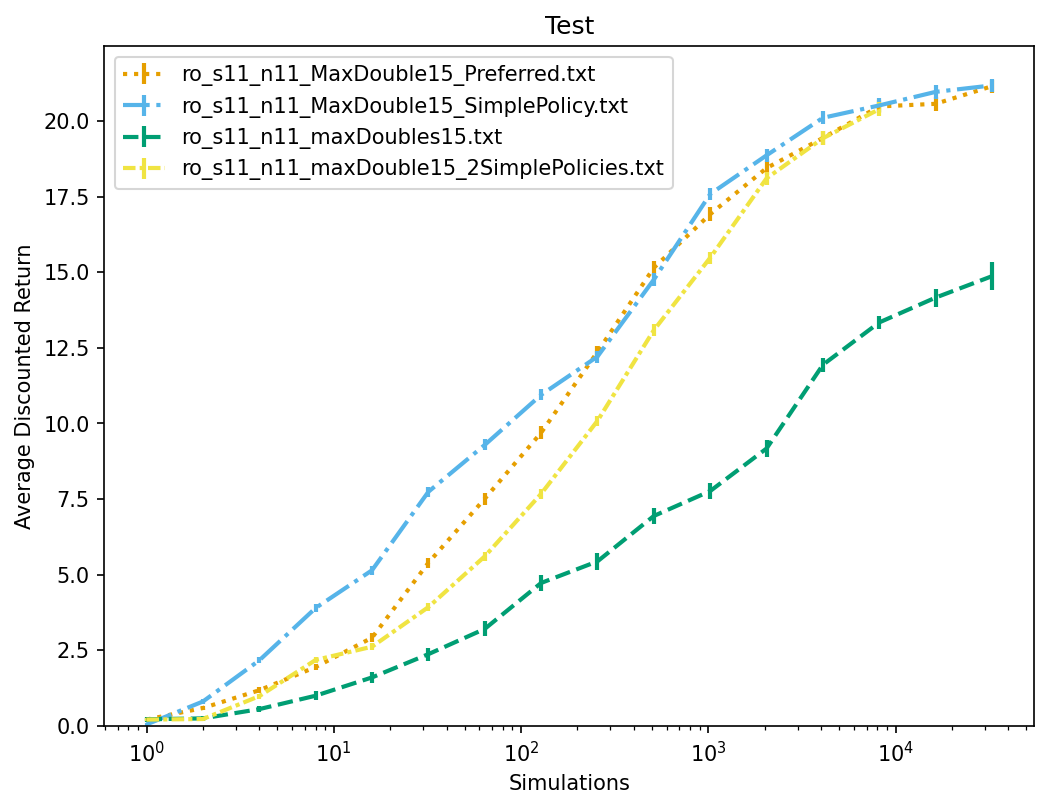

In [8]:
filenames = [
    'ro_s11_n11_MaxDouble15_Preferred.txt',
    'ro_s11_n11_MaxDouble15_SimplePolicy.txt',
    'ro_s11_n11_maxDoubles15.txt',
    'ro_s11_n11_maxDouble15_2SimplePolicies.txt']

final_data_df = read_data(filenames)
plot_final_data(final_data_df)